In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [16]:
data = pd.read_csv('FSVA 2022 Cleaned.csv')
data.head()

,Komposit,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%)
0,5,0.78,13.18,52.86,0.00,46.34,8.75,2.43,64.40,27.3
1,6,0.28,13.41,38.71,0.00,41.55,9.62,2.87,68.22,34.1
2,6,0.52,14.45,32.76,0.00,33.96,8.66,2.01,68.74,38.2
3,4,2.57,15.26,28.92,0.24,42.25,10.10,2.45,68.86,34.3
4,6,0.56,18.81,38.49,0.00,21.76,10.22,1.82,67.99,27.4


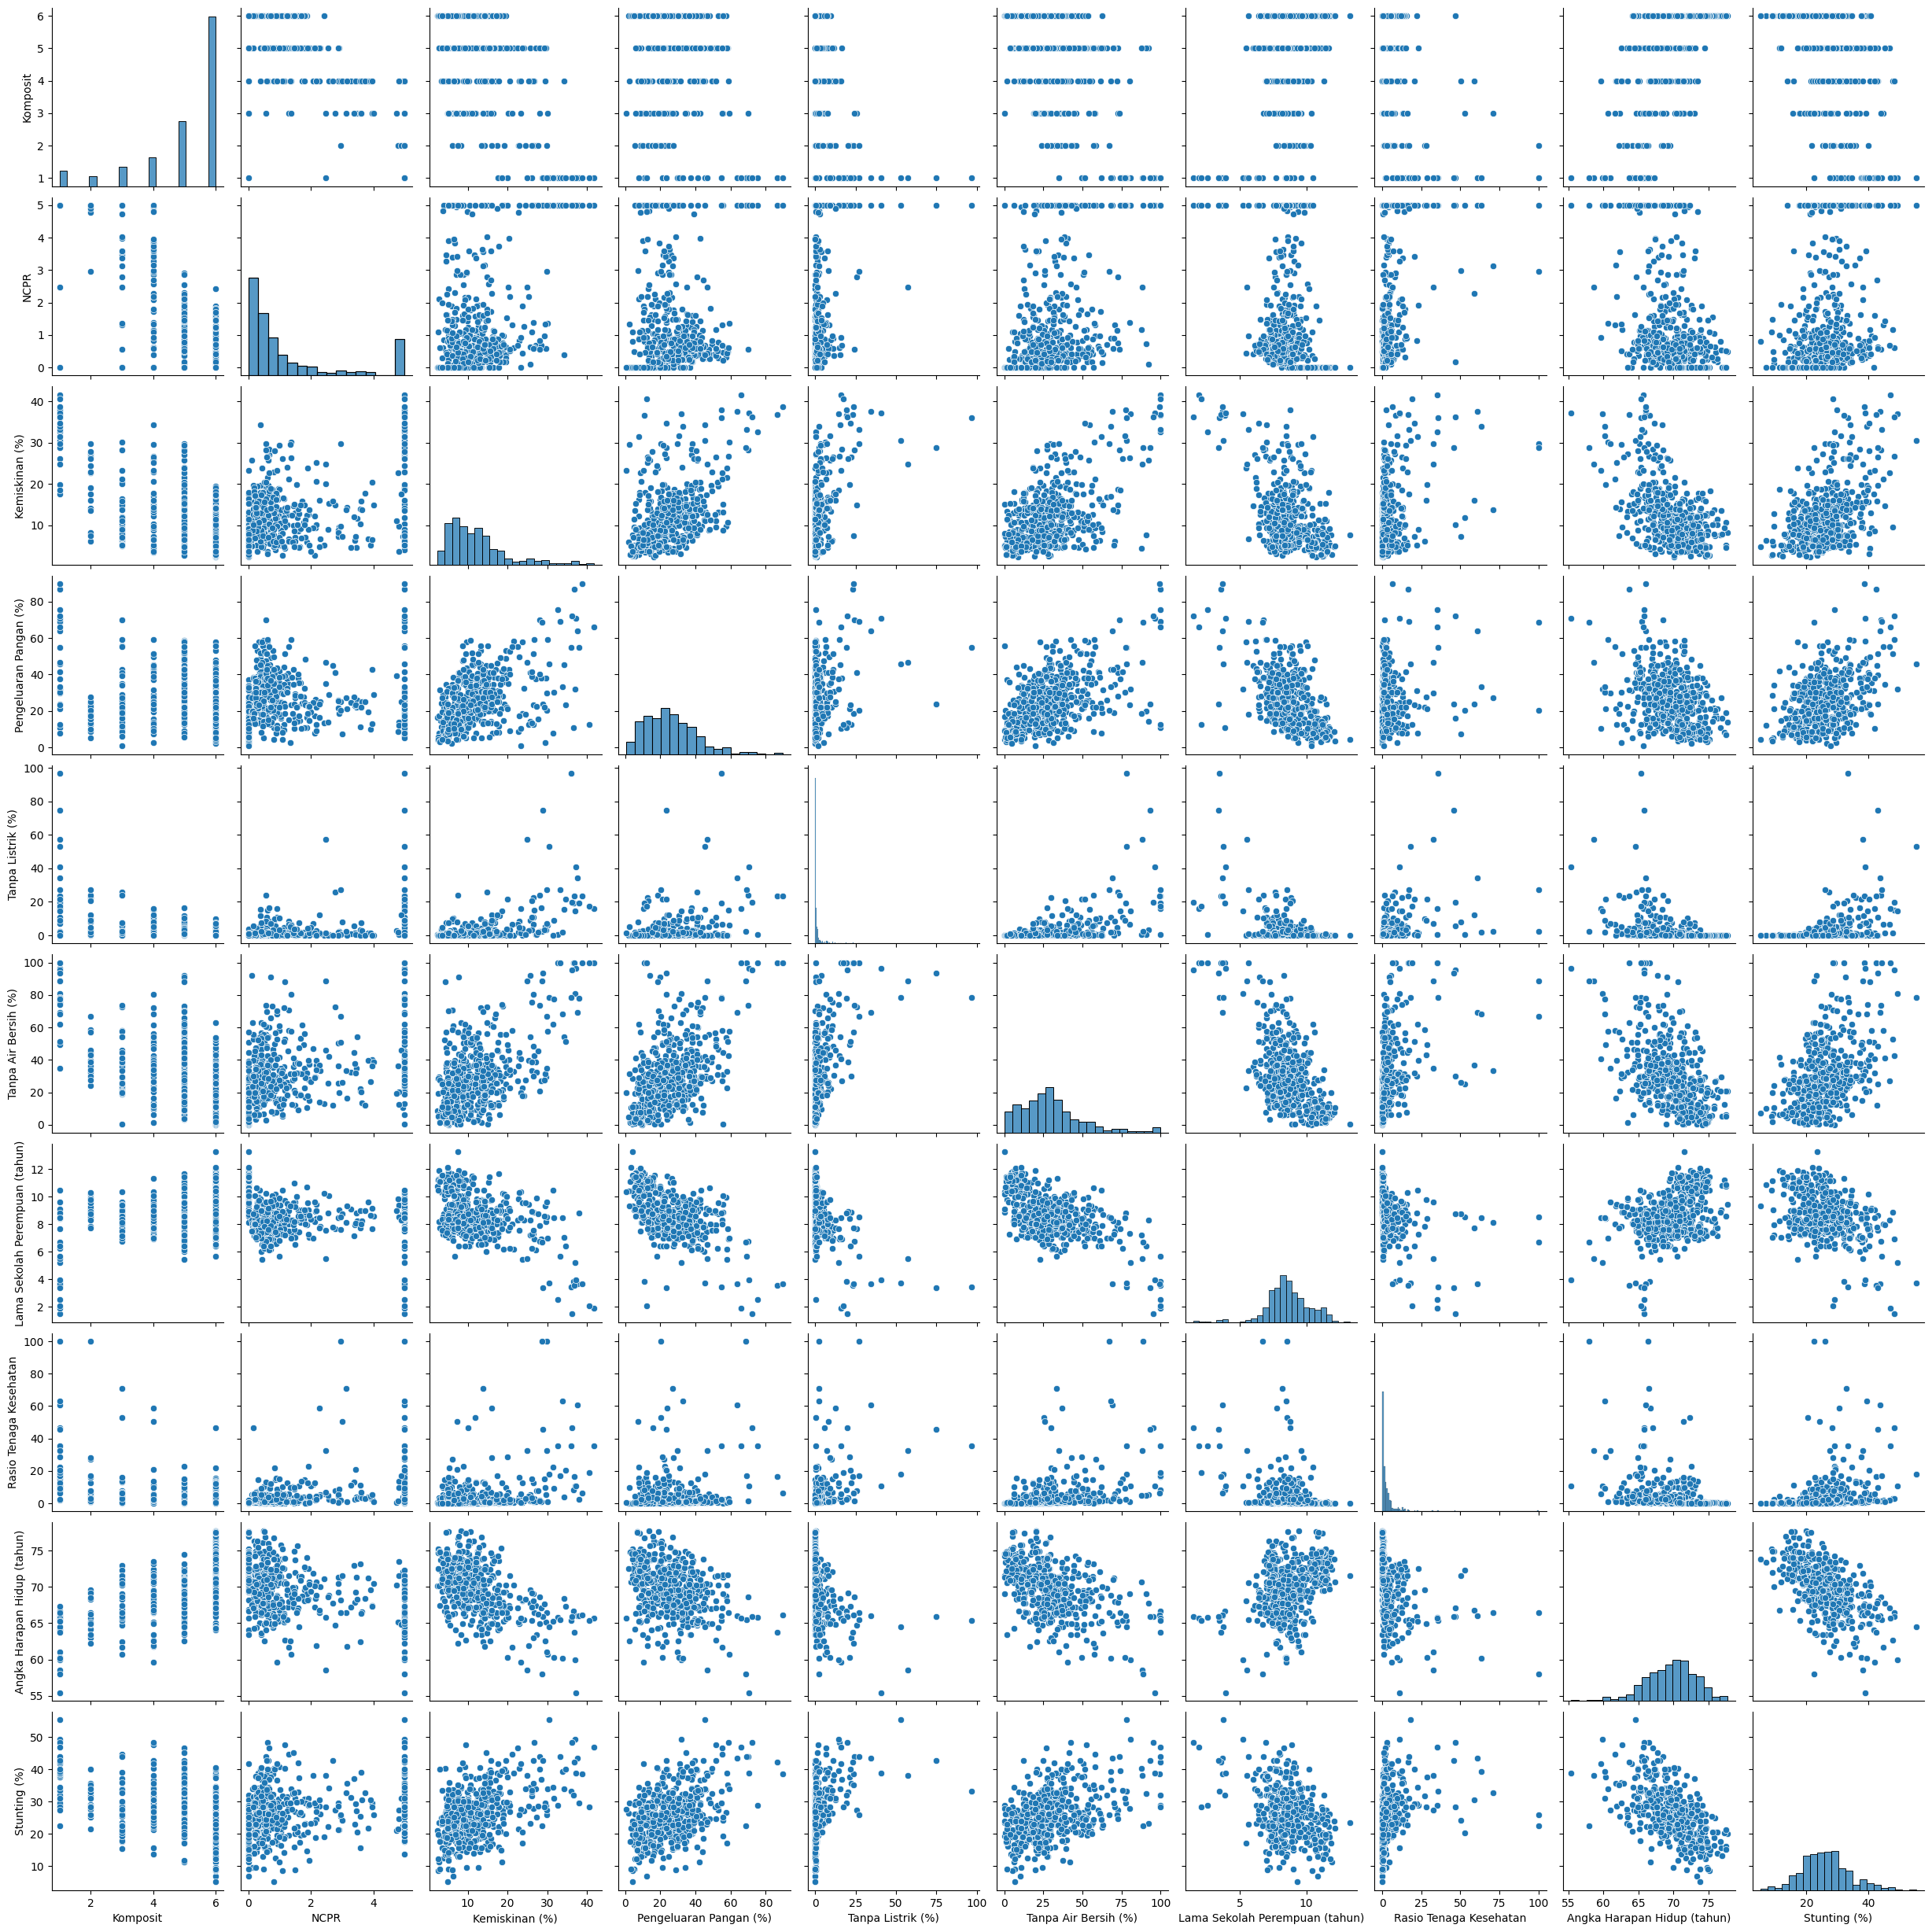

In [17]:
sns.pairplot(data)

<Axes: >

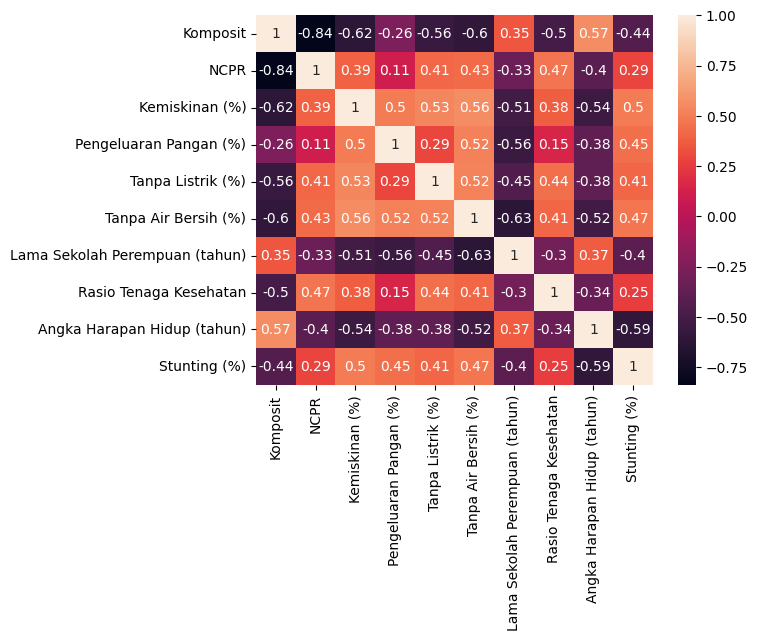

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Komposit                        514 non-null    int64  
 1   NCPR                            514 non-null    float64
 2   Kemiskinan (%)                  514 non-null    float64
 3   Pengeluaran Pangan (%)          514 non-null    float64
 4   Tanpa Listrik (%)               514 non-null    float64
 5   Tanpa Air Bersih (%)            514 non-null    float64
 6   Lama Sekolah Perempuan (tahun)  514 non-null    float64
 7   Rasio Tenaga Kesehatan          514 non-null    float64
 8   Angka Harapan Hidup (tahun)     514 non-null    float64
 9   Stunting (%)                    514 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 40.3 KB


In [20]:
X = data.drop(columns = ['Komposit'])
y = data['Komposit']

In [21]:
X.head()

,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%)
0,0.78,13.18,52.86,0.00,46.34,8.75,2.43,64.40,27.3
1,0.28,13.41,38.71,0.00,41.55,9.62,2.87,68.22,34.1
2,0.52,14.45,32.76,0.00,33.96,8.66,2.01,68.74,38.2
3,2.57,15.26,28.92,0.24,42.25,10.10,2.45,68.86,34.3
4,0.56,18.81,38.49,0.00,21.76,10.22,1.82,67.99,27.4


In [22]:
y.head()

0    5
1    6
2    6
3    4
4    6
Name: Komposit, dtype: int64

In [23]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Normalization Transform for Feature Variable
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix_test = confusion_matrix(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi pada data pengujian
print("\nEvaluation on Data Test:")
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix_test}')
print(f'Classification Report:\n{classification_rep_test}')


Evaluation on Data Test:
Accuracy: 0.8349514563106796
Confusion Matrix:
[[ 5  0  0  0  1  0]
 [ 1  3  0  0  0  0]
 [ 0  0  3  4  0  1]
 [ 0  0  1  4  2  1]
 [ 0  0  0  1 17  3]
 [ 0  0  0  0  2 54]]
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       1.00      0.75      0.86         4
           3       0.75      0.38      0.50         8
           4       0.44      0.50      0.47         8
           5       0.77      0.81      0.79        21
           6       0.92      0.96      0.94        56

    accuracy                           0.83       103
   macro avg       0.79      0.71      0.73       103
weighted avg       0.84      0.83      0.83       103



In [15]:
def predict_user_input():
    user_input = []
    for feature in X.columns:
        value = float(input(f"Masukkan nilai untuk {feature}: "))
        user_input.append(value)
    
    # Normalize User's input 
    user_input = scaler.transform([user_input])

    # Melakukan prediksi
    prediction = rf_classifier.predict(user_input)
    return prediction[0]

In [16]:
# user give input and get predict
user_prediction = predict_user_input()

# print prediction
print(f"Hasil prediksi: {user_prediction}")

Hasil prediksi: 5
